# Assignment 7: Logistic Regression

## Dataset: Titanic Survival Prediction

**Objective:** Predict passenger survival using Logistic Regression.

**Topics Covered:**
- Logistic Regression
- Binary Classification
- ROC Curve and AUC
- Model Interpretation

---
## Step 1: Import Libraries and Load Data

In [ ]:
# Import required libraries
import pandas as p.d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
df_train = pd.read_csv('datasets/Titanic_train.csv')
df_test = pd.read_csv('datasets/Titanic_test.csv')

print("Training set loaded! Shape:", df_train.shape)
print("Testing set loaded! Shape:", df_test.shape)
print("\nFirst 5 rows of training data:")
df_train.head()

Training set loaded! Shape: (891, 12)
Testing set loaded! Shape: (418, 11)

First 5 rows of training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,2,Passenger_1,male,78.0,1,0,Ticket_83848,106.0417,C33,S
1,2,0,2,Passenger_2,male,34.0,1,0,Ticket_53629,104.8638,NaN,S
2,3,0,3,Passenger_3,female,51.0,0,0,Ticket_90076,251.5739,C40,S
3,4,0,3,Passenger_4,female,56.0,0,0,Ticket_37109,271.8315,NaN,Q
4,5,1,3,Passenger_5,male,48.0,3,0,Ticket_25181,131.1208,NaN,S


---
## Step 2: Exploratory Data Analysis (EDA)

In [2]:
# Check data types and summary
print("=== Data Types ===")
print(df_train.dtypes)

print("\n=== Summary Statistics ===")
df_train.describe()

=== Data Types ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== Summary Statistics ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,705.000000,891.000000,891.000000,891.000000
mean,446.000000,0.369248,2.319865,38.631206,0.480359,0.409652,257.859657
std,257.353842,0.482872,0.807158,22.196441,0.792100,0.856880,146.141898
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.342900
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,135.491650
50%,446.000000,0.000000,3.000000,38.000000,0.000000,0.000000,251.573900
75%,668.500000,1.000000,3.000000,57.000000,1.000000,0.000000,387.545550
max,891.000000,1.000000,3.000000,79.000000,5.000000,6.000000,511.740400


In [3]:
# Check missing values
print("=== Missing Values ===")
missing = df_train.isnull().sum()
missing_pct = (missing / len(df_train)) * 100

for col in df_train.columns:
    if missing[col] > 0:
        print(col + ":", missing[col], "(", round(missing_pct[col], 2), "%)")

=== Missing Values ===
Age: 186 ( 20.88 %)
Cabin: 689 ( 77.33 %)


=== Survival Distribution ===
Survived
0    562
1    329
Name: count, dtype: int64


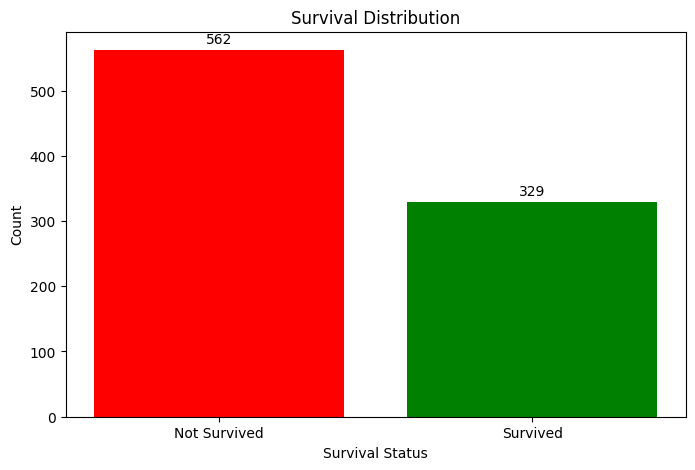

In [4]:
# Target variable distribution
print("=== Survival Distribution ===")
survival_counts = df_train['Survived'].value_counts()
print(survival_counts)

plt.figure(figsize=(8, 5))
plt.bar(['Not Survived', 'Survived'], survival_counts.values, color=['red', 'green'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Distribution')

for i in range(len(survival_counts)):
    plt.text(i, survival_counts.values[i] + 10, str(survival_counts.values[i]), ha='center')

plt.show()

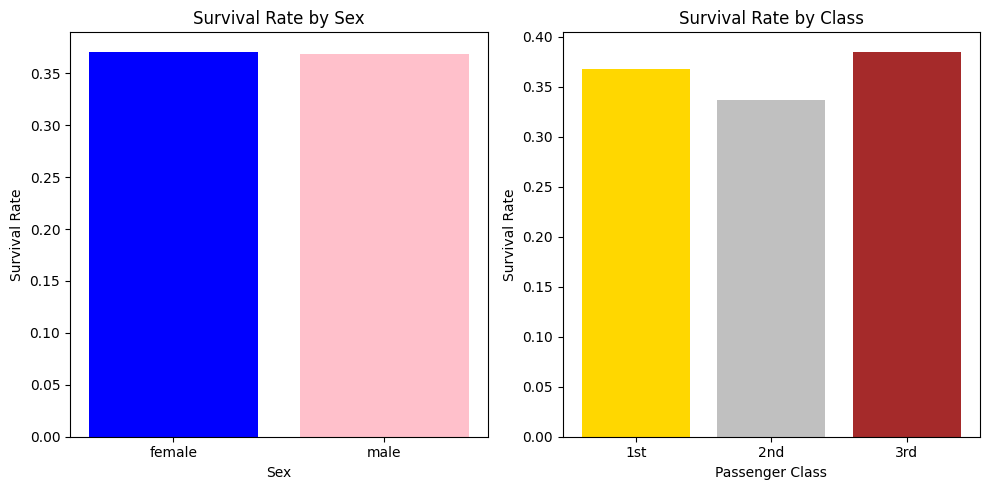

In [5]:
# Survival by Sex
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sex_survival = df_train.groupby('Sex')['Survived'].mean()
plt.bar(sex_survival.index, sex_survival.values, color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

# Survival by Pclass
plt.subplot(1, 2, 2)
class_survival = df_train.groupby('Pclass')['Survived'].mean()
plt.bar(['1st', '2nd', '3rd'], class_survival.values, color=['gold', 'silver', 'brown'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')

plt.tight_layout()
plt.show()

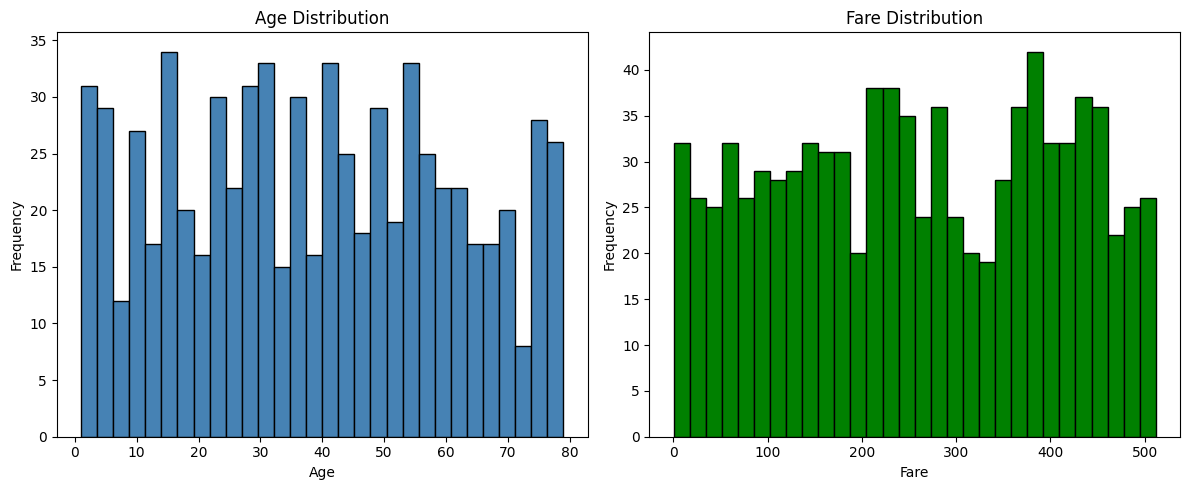

In [6]:
# Age distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train['Age'].dropna(), bins=30, color='steelblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_train['Fare'], bins=30, color='green', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

---
## Step 3: Data Preprocessing

In [7]:
# Create a copy for preprocessing
df = df_train.copy()

# Handle missing values
print("=== Handling Missing Values ===")

# Fill Age with median
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
print("Filled Age with median:", age_median)

# Fill Embarked with mode
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)
print("Filled Embarked with mode:", embarked_mode)

# Drop Cabin (too many missing values)
df = df.drop('Cabin', axis=1)
print("Dropped Cabin column")

print("\nRemaining missing values:", df.isnull().sum().sum())

=== Handling Missing Values ===
Filled Age with median: 38.0
Filled Embarked with mode: S
Dropped Cabin column

Remaining missing values: 0


In [8]:
# Encode categorical variables
print("=== Encoding Categorical Variables ===")

# Encode Sex (Male=1, Female=0)
df['Sex_encoded'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
print("Sex: male=1, female=0")

# Encode Embarked
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked_encoded'] = df['Embarked'].map(embarked_mapping)
print("Embarked: S=0, C=1, Q=2")

df.head()

=== Encoding Categorical Variables ===
Sex: male=1, female=0
Embarked: S=0, C=1, Q=2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded,Embarked_encoded
0,1,1,2,Passenger_1,male,78.0,1,0,Ticket_83848,106.0417,S,1,0
1,2,0,2,Passenger_2,male,34.0,1,0,Ticket_53629,104.8638,S,1,0
2,3,0,3,Passenger_3,female,51.0,0,0,Ticket_90076,251.5739,S,0,0
3,4,0,3,Passenger_4,female,56.0,0,0,Ticket_37109,271.8315,Q,0,2
4,5,1,3,Passenger_5,male,48.0,3,0,Ticket_25181,131.1208,S,1,0


In [9]:
# Select features for model
feature_cols = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']

X = df[feature_cols]
y = df['Survived']

print("Features:", feature_cols)
print("X shape:", X.shape)
print("y shape:", y.shape)

Features: ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
X shape: (891, 7)
y shape: (891,)


In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 712
Testing set: 179


In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


---
## Step 4: Model Building

In [12]:
# Build Logistic Regression model
print("=== Training Logistic Regression Model ===")

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")

=== Training Logistic Regression Model ===
Model trained successfully!


In [13]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Predictions made on test set")

Predictions made on test set


---
## Step 5: Model Evaluation

In [14]:
# Calculate metrics
print("=== Model Evaluation ===")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

=== Model Evaluation ===
Accuracy: 0.6536
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5216


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


=== Confusion Matrix ===


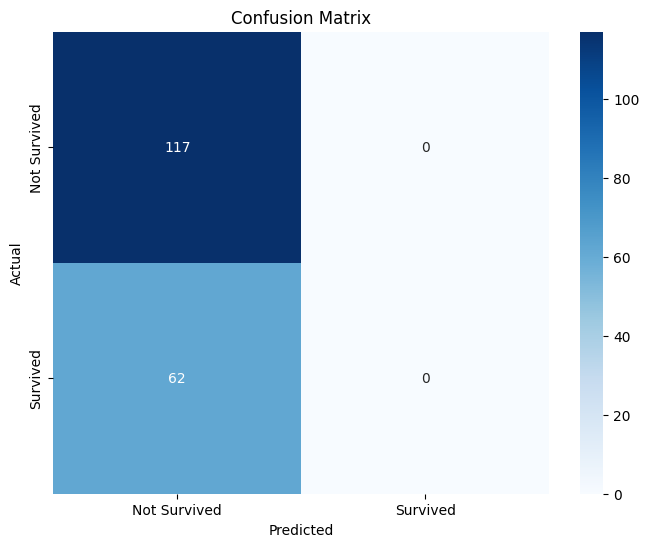


True Negatives: 117
False Positives: 0
False Negatives: 62
True Positives: 0


In [15]:
# Confusion Matrix
print("=== Confusion Matrix ===")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nTrue Negatives:", cm[0][0])
print("False Positives:", cm[0][1])
print("False Negatives:", cm[1][0])
print("True Positives:", cm[1][1])

=== ROC Curve ===


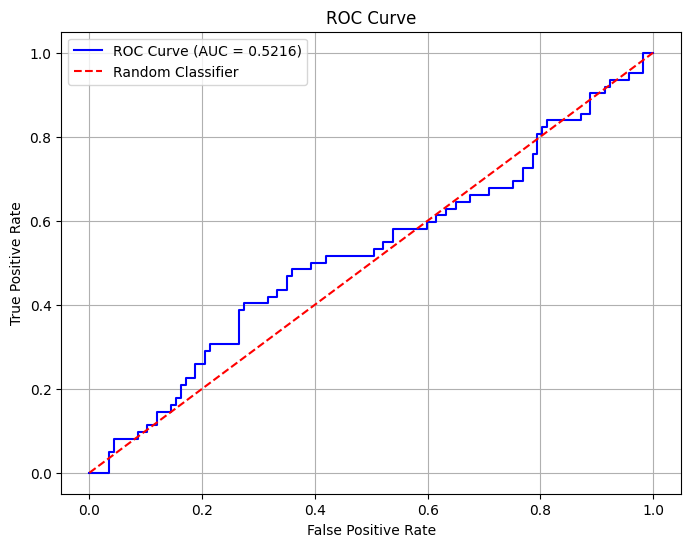

In [16]:
# ROC Curve
print("=== ROC Curve ===")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = ' + str(round(roc_auc, 4)) + ')')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

=== Classification Report ===
              precision    recall  f1-score   support

Not Survived       0.65      1.00      0.79       117
    Survived       0.00      0.00      0.00        62

    accuracy                           0.65       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.43      0.65      0.52       179



c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

---
## Step 6: Model Interpretation

In [18]:
# Interpret coefficients
print("=== Logistic Regression Coefficients ===")

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("\nIntercept:", round(intercept, 4))
print("\nCoefficients:")
for i in range(len(feature_cols)):
    coef = coefficients[i]
    feature = feature_cols[i]
    print("  " + feature + ":", round(coef, 4))

=== Logistic Regression Coefficients ===

Intercept: -0.5115

Coefficients:
  Pclass: 0.0423
  Sex_encoded: 0.023
  Age: -0.0249
  SibSp: 0.009
  Parch: 0.0394
  Fare: 0.0118
  Embarked_encoded: 0.0322


=== Feature Importance ===


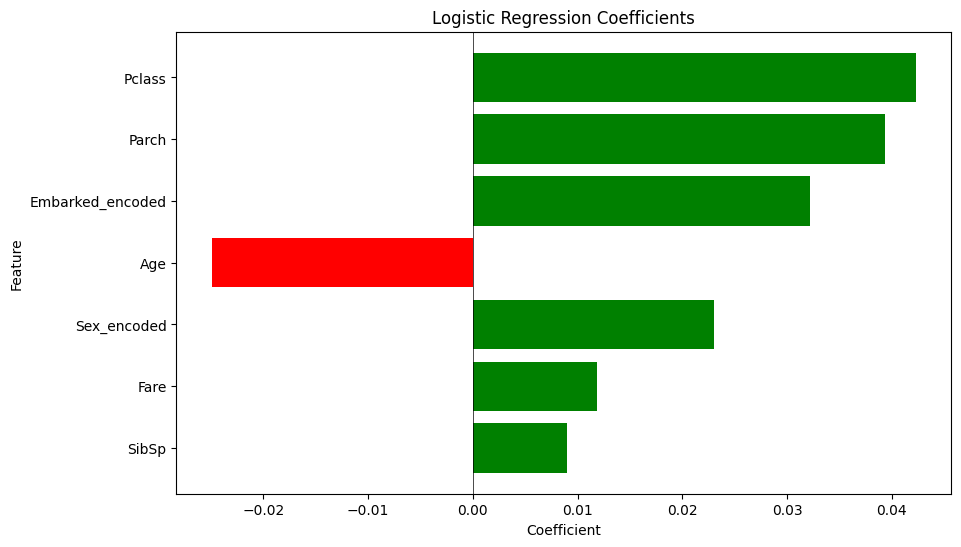


Interpretation:
- Positive coefficient = increases survival probability
- Negative coefficient = decreases survival probability
- Sex_encoded (negative): Being male reduces survival chances
- Pclass (negative): Higher class number (3rd class) reduces survival


In [19]:
# Feature Importance (based on absolute coefficient value)
print("=== Feature Importance ===")

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

importance_df = importance_df.sort_values('Abs_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in importance_df['Coefficient']]
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.show()

print("\nInterpretation:")
print("- Positive coefficient = increases survival probability")
print("- Negative coefficient = decreases survival probability")
print("- Sex_encoded (negative): Being male reduces survival chances")
print("- Pclass (negative): Higher class number (3rd class) reduces survival")

---
## Step 7: Save Model for Deployment

In [20]:
# Save model for Streamlit deployment
import pickle

# Save model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved for deployment!")

Model and scaler saved for deployment!


---
## Interview Questions

### 1. Difference between Precision and Recall

| Metric | Formula | Meaning |
|--------|---------|--------|
| **Precision** | TP / (TP + FP) | Of all predicted positives, how many are actually positive? |
| **Recall** | TP / (TP + FN) | Of all actual positives, how many did we correctly predict? |

**When to use which:**
- **High Precision needed:** When false positives are costly (e.g., spam detection)
- **High Recall needed:** When false negatives are costly (e.g., disease detection)

### 2. Cross-Validation in Binary Classification

**What is Cross-Validation?**
- Technique to evaluate model by splitting data into multiple folds
- Train on some folds, test on remaining fold
- Repeat for all folds and average results

**Why is it important?**
1. Gives more reliable estimate of model performance
2. Reduces overfitting by testing on different data subsets
3. Uses all data for both training and testing
4. Helps in hyperparameter tuning

---
## Summary

In this assignment, we:

1. **Explored** the Titanic dataset and visualized survival patterns
2. **Preprocessed** data by handling missing values and encoding categoricals
3. **Built** a Logistic Regression model
4. **Evaluated** using accuracy, precision, recall, F1, and ROC-AUC
5. **Interpreted** coefficients to understand feature importance
6. **Saved** model for Streamlit deployment